In [5]:
import sys
import sys
sys.path.append('../src/')
import gymnasium
from envs.gates_env import QuadXGatesEnv
from PyFlyt.gym_envs import FlattenWaypointEnv

env = QuadXGatesEnv(render_mode="human")
env = FlattenWaypointEnv(QuadXGatesEnv(render_mode="human"), context_length=1)

obs = env.reset()

termination = False
truncation = False

AssertionError: Only a waypoints environment can be used with the `FlattenWaypointEnv` wrapper.

In [4]:
obs[0]

{'attitude': array([-9.66513602e-03,  1.33102928e-03,  1.90901790e-03, -1.84489513e-04,
         1.52589616e-05,  8.85404468e-05,  9.99999979e-01,  2.31436855e-05,
         2.82798177e-04, -7.63261354e-01, -6.94638663e-09,  1.96951893e-08,
         9.68135240e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.26681297e-02,  5.12037445e-02,  4.98110530e-02,
         4.92381749e-02]),
 'rgba_cam': array([[[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [239, 239, 239, ..., 162, 162, 162],
         [239, 239, 239, ..., 162, 162, 162],
         [239, 239, 239, ..., 162, 162, 162]],
 
        [[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [239, 239, 239, ..., 186, 186, 186],
         [239, 239, 239, ..., 186, 186, 186],
         [239, 239, 239, ..., 18

In [6]:
env.action_space.sample()
env.observation_space.sample()["target_deltas"]

(array([-0.81838112, -0.71040898,  1.92718487]),)

In [2]:
env.close()

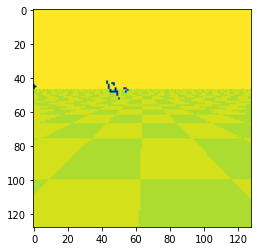

In [18]:
import matplotlib.pyplot as plt
plt.imshow(obs[0]["rgba_cam"][2])

In [2]:
while not termination or truncation:
    observation, reward, termination, truncation, info = env.step(env.action_space.sample())
env.close()

In [2]:
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
import gymnasium

env = gymnasium.make("PyFlyt/QuadX-Waypoints-v1", render_mode="rgb_array")
env = FlattenWaypointEnv(env, context_length=2)
env.reset()

is_training = True
if is_training:
    model = A2C(
        "MlpPolicy",
        env,
        learning_rate=5e-4,
        learning_starts=200,
        batch_size=32,
        gamma=0.8,
        train_freq=1,
        gradient_steps=1,
        target_update_interval=50,
        exploration_fraction=0.7,
        verbose=1,
        tensorboard_log="highway_cnn/",
    )
    model.learn(total_timesteps=int(1e3))
    model.save("../model")
    env.close()

NamespaceNotFound: Namespace PyFlyt not found. Have you installed the proper package for PyFlyt?

In [5]:
# Evaluate performance on test runs
from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(
    model,
    model.get_env(),
    deterministic=True,
    n_eval_episodes=20,
    render=False
)
env.close()
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

NameError: name 'model' is not defined

In [7]:
env.close()